In [1]:
import json
from collections import Counter
from google.colab import drive
drive.mount('/content/gdrive')
from collections import defaultdict
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [2]:
# Read the JSON file
with open('/content/gdrive/MyDrive/Colab Notebooks/경기도자율주행/data/train.json', 'r') as file:
    data = json.load(file)

# Initialize a Counter to count class occurrences
class_distribution = Counter()

# Iterate through the annotations
for item in data:
    annotations = item.get("annotations", [])
    for annotation in annotations:
        lbl_nm = annotation.get("lbl_nm", "Unknown")
        class_distribution[lbl_nm] += 1

# Print the class distribution
for lbl_nm, count in class_distribution.items():
    print(f"{lbl_nm}: {count}")


Car(승용, 승합): 97000
Bus(버스): 12497
Motorcycle(오토바이): 8943
Truck(트럭): 21560
Person(보행자): 55632
Bicycle(자전거): 619


In [4]:
# Initialize a dictionary to store class-wise size information
class_sizes = defaultdict(list)

# Iterate through the annotations
for item in data:
    annotations = item.get("annotations", [])
    for annotation in annotations:
        lbl_nm = annotation.get("lbl_nm", "Unknown")
        annotation_info = annotation.get("annotations_info", [])
        if len(annotation_info) == 4:
            # Calculate the width and height of the bounding box
            width = annotation_info[2]
            height = annotation_info[3]
            # Calculate the area of the bounding box
            area = width * height
            class_sizes[lbl_nm].append(area)

# Calculate the average size for each class
average_sizes = {}
for lbl_nm, sizes in class_sizes.items():
    if sizes:
        average_size = sum(sizes) / len(sizes)
        average_sizes[lbl_nm] = average_size

# Print the average size for each class
for lbl_nm, average_size in average_sizes.items():
    print(f"{lbl_nm}: Average Size = {average_size:.2f}")

Car(승용, 승합): Average Size = 15120.70
Bus(버스): Average Size = 32138.52
Motorcycle(오토바이): Average Size = 6739.99
Truck(트럭): Average Size = 20562.69
Person(보행자): Average Size = 5622.32
Bicycle(자전거): Average Size = 5008.32


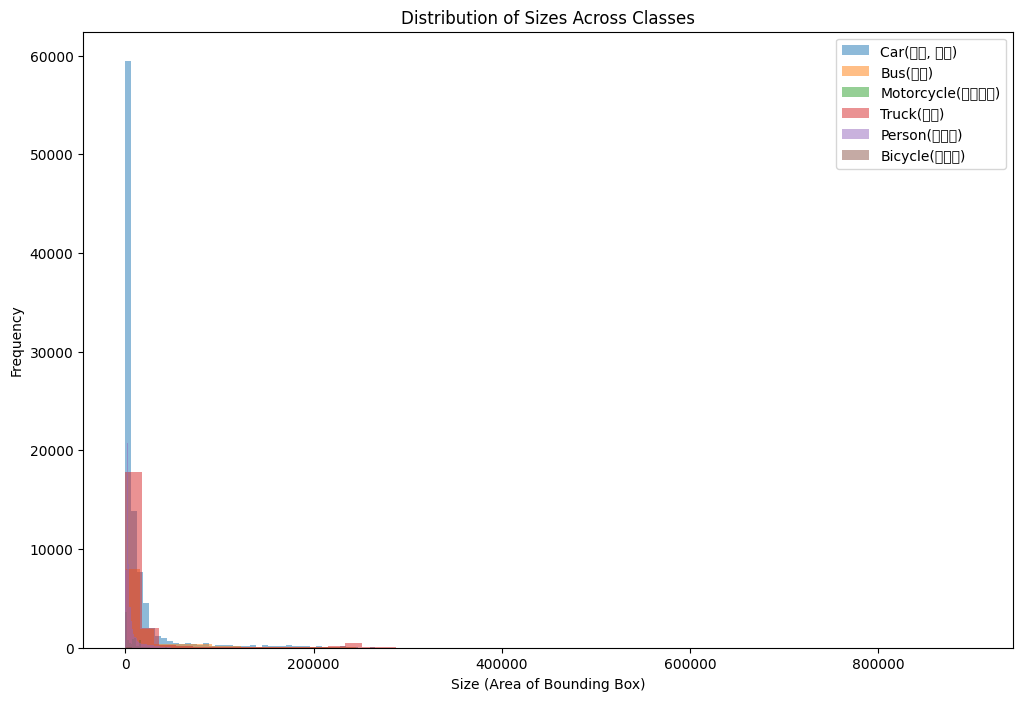

In [9]:
# Initialize a dictionary to store class-wise size information
class_sizes = {}

# Iterate through the annotations
for item in data:
    annotations = item.get("annotations", [])
    for annotation in annotations:
        lbl_nm = annotation.get("lbl_nm", "Unknown")
        annotation_info = annotation.get("annotations_info", [])
        if len(annotation_info) == 4:
            # Calculate the width and height of the bounding box
            width = annotation_info[2]
            height = annotation_info[3]
            # Calculate the area of the bounding box
            area = width * height
            if lbl_nm not in class_sizes:
                class_sizes[lbl_nm] = []
            class_sizes[lbl_nm].append(area)

# Create a separate histogram for each class
plt.figure(figsize=(12, 8))
for lbl_nm, sizes in class_sizes.items():
    plt.hist(sizes, bins=50, alpha=0.5, label=lbl_nm)


plt.title('Distribution of Sizes Across Classes')
plt.xlabel('Size (Area of Bounding Box)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:

# Initialize a dictionary to store the count of images per "cctv_fclt_id"
images_per_cctv = {}

# Iterate through the data and count the number of unique images per "cctv_fclt_id"
for item in data:
    cctv_fclt_id = item.get("images", {}).get("cctv_fclt_id", "Unknown")
    img_id = item.get("images", {}).get("img_id", "Unknown")
    if cctv_fclt_id in images_per_cctv:
        images_per_cctv[cctv_fclt_id].add(img_id)
    else:
        images_per_cctv[cctv_fclt_id] = {img_id}

# Print the count of unique images per "cctv_fclt_id"
for cctv_fclt_id, images in images_per_cctv.items():
    print(f"CCTV Facility ID {cctv_fclt_id}: {len(images)} unique images")


CCTV Facility ID 3043: 6281 unique images
CCTV Facility ID 3044: 6325 unique images
CCTV Facility ID 3045: 1394 unique images
